In [953]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

**Задание 1**

In [954]:
df = pd.read_csv("happines_corruption.csv")
df.info()  # все хорошо, все столбцы заполнены данных корректны. Явных выбросов так же не наблюдается
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


Гипотезы:

1) Верно ли, что чем выше ВВП, тем выше и уровень счастья?

2) Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?

<Axes: xlabel='gdp_per_capita', ylabel='happiness_score'>

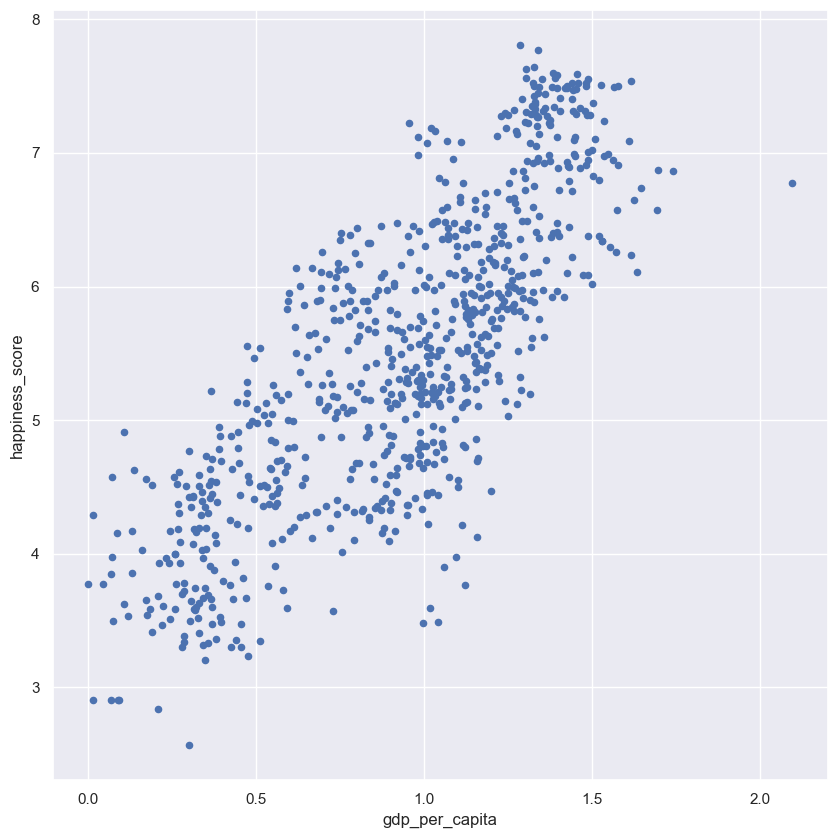

In [955]:
# Гипотеза 1

# визуализируем взаимосвязь между ВВП и уровнем счастья, похоже, что есть некая линейная зависимость

df.plot(kind="scatter", x="gdp_per_capita", y="happiness_score")

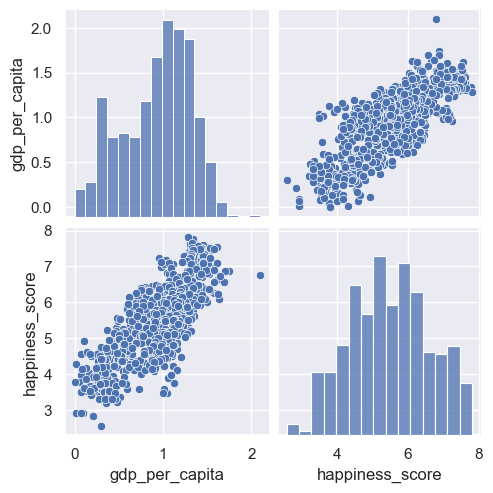

In [956]:
sns.pairplot(df, vars=["gdp_per_capita", "happiness_score"])

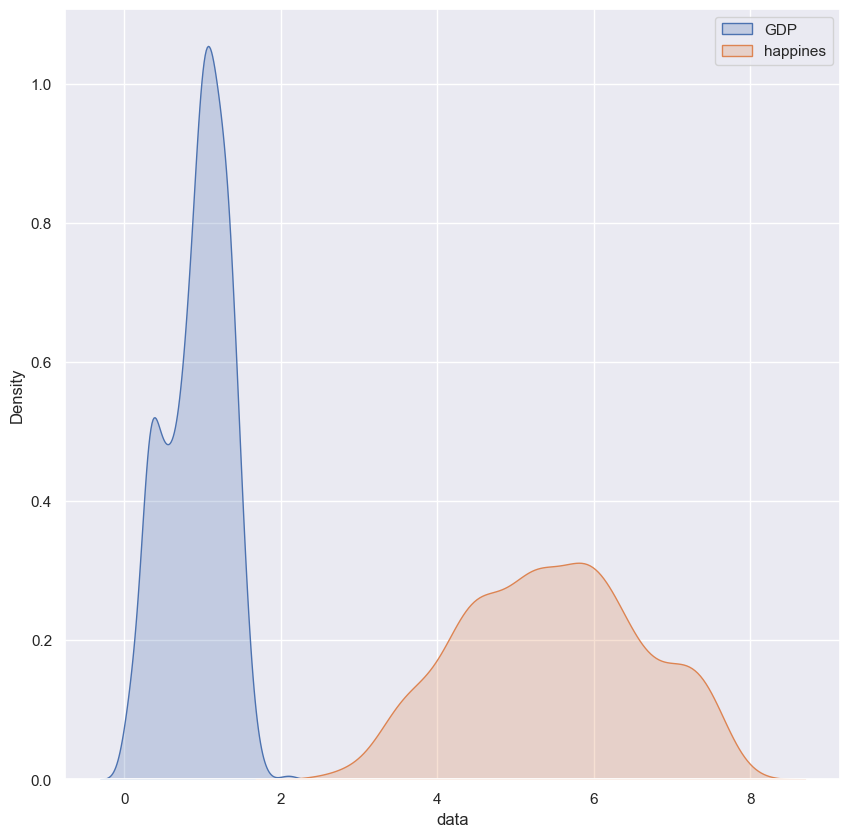

In [957]:
# построим график плотности раcпределения
gdp = pd.Series(df["gdp_per_capita"])
happines = pd.Series(df["happiness_score"])

plt.figure()
sns.kdeplot(gdp, label="GDP", fill=True)
sns.kdeplot(happines, label="happines", fill=True)
plt.xlabel("data")
plt.legend()
plt.show()

In [958]:
# похоже, что данные распределены нормально, подтвердим это при помощи теста Шапиро-Уилка


def check_normality(data, alpha=0.05):
    stat, p = st.shapiro(data)
    print(f"stat = {stat:.3f}, p = {p:.3f}")
    if p < alpha:  # условие статистической значимости
        print(
            "Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально\n"
        )
    else:
        print(
            "Shapiro: Не отклоняем нулевую гипотезу >> Данные распределены нормально\n"
        )


for param in [gdp, happines]:
    print(f"{param.name}:")
    print(f"ties_%: ", round((param.duplicated().sum() / len(param)) * 100, 2))
    check_normality(param)

gdp_per_capita:
ties_%:  3.16
stat = 0.969, p = 0.000
Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально

happiness_score:
ties_%:  5.68
stat = 0.985, p = 0.000
Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально



In [959]:
# тест показывает отсутствие нормального распределения и мало повторяющихся значений в каждом из списков, поэтому используем в расчетах коэффициент корреляции Спирмена, а не Пирсона или Кендала

df[["gdp_per_capita", "happiness_score"]].corr(method="pearson")
# как мы видим корреляция довольно значима между этими двумя значениями поэтому можно сказать утвердительно, что уровень счастья выше, чем выше уровень ВВП

,gdp_per_capita,happiness_score
gdp_per_capita,1.000000,0.793267
happiness_score,0.793267,1.000000


In [960]:
# Гипотеза 2

# визуализируем взаимосвязь между доверием к правительству и уровнем счастья, линейная зависимость визуально не прослеживается

<Axes: xlabel='government_trust', ylabel='happiness_score'>

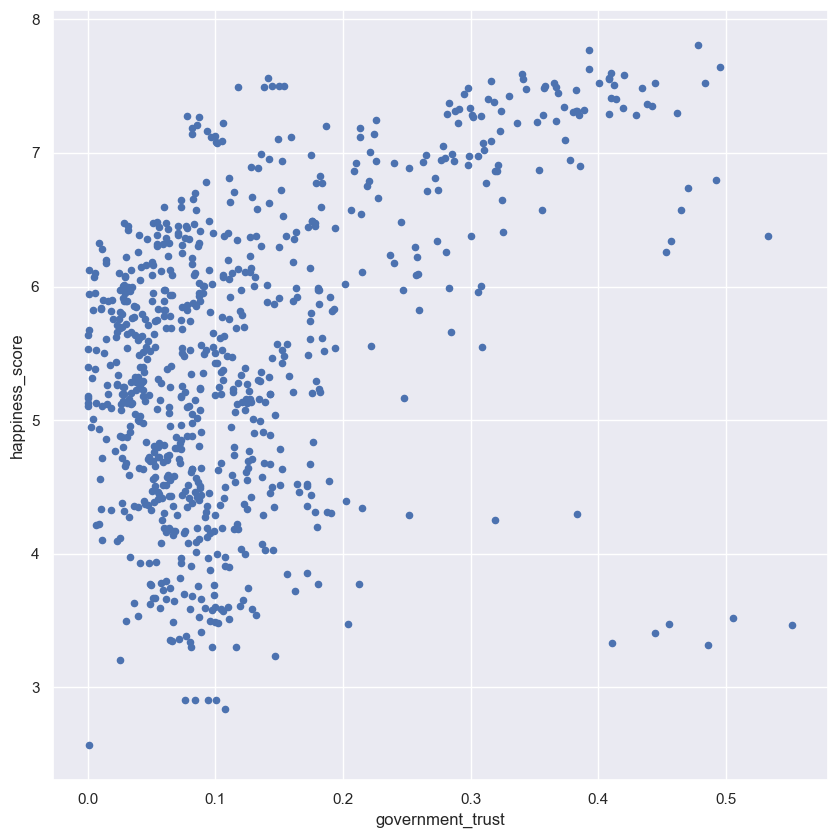

In [961]:
df.plot(kind="scatter", x="government_trust", y="happiness_score")

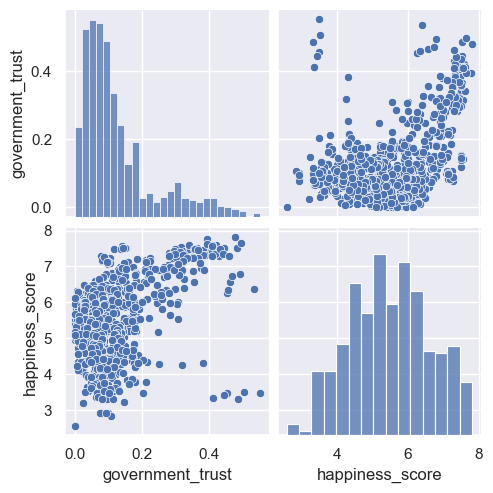

In [962]:
sns.pairplot(df, vars=["government_trust", "happiness_score"])

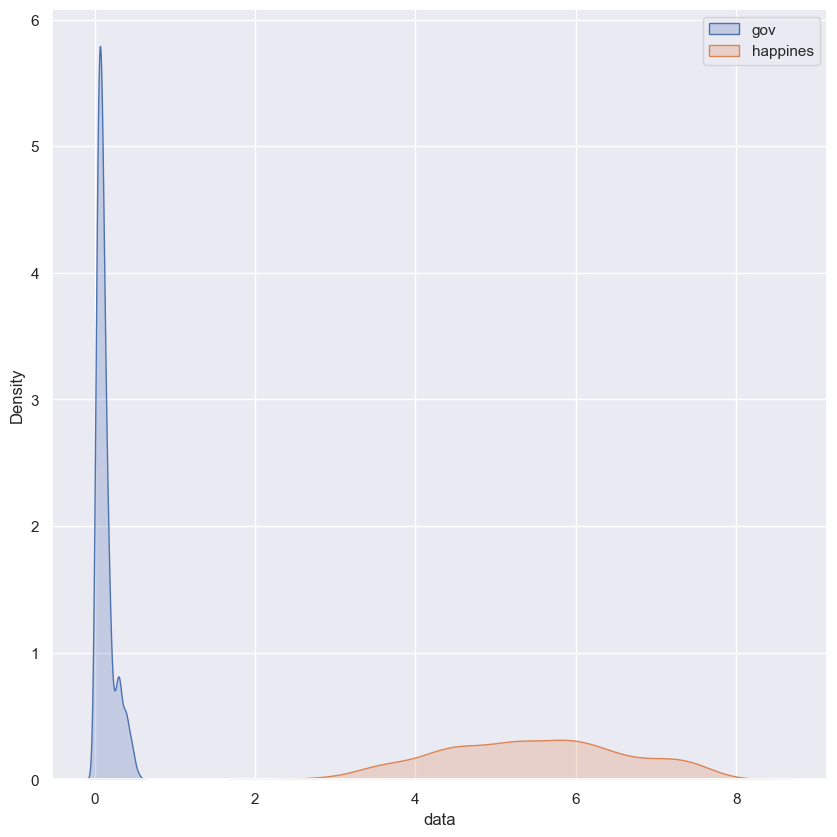

In [963]:
# построим график плотности раcпределения
gov = pd.Series(df["government_trust"])
happines = pd.Series(df["happiness_score"])

plt.figure()
sns.kdeplot(gov, label="gov", fill=True)
sns.kdeplot(happines, label="happines", fill=True)
plt.xlabel("data")
plt.legend()
plt.show()

In [964]:
for param in [gov, happines]:
    print(f"{param.name}:")
    print(f"ties_%: ", round((param.duplicated().sum() / len(param)) * 100, 2))
    check_normality(param)

government_trust:
ties_%:  13.89
stat = 0.832, p = 0.000
Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально

happiness_score:
ties_%:  5.68
stat = 0.985, p = 0.000
Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально



In [965]:
# тест показывает отсутствие нормального распределения и относительно много повторяющихся значений в списке доверия к правительству, поэтому используем в расчетах коэффициент корреляции Кендала

df[["government_trust", "happiness_score"]].corr(method="kendall")
# как мы видим корреляция довольно невысока, поэтому можно сказать, что взаимосвязь между этими выбоками очень слабая

,government_trust,happiness_score
government_trust,1.000000,0.234573
happiness_score,0.234573,1.000000


<Axes: >

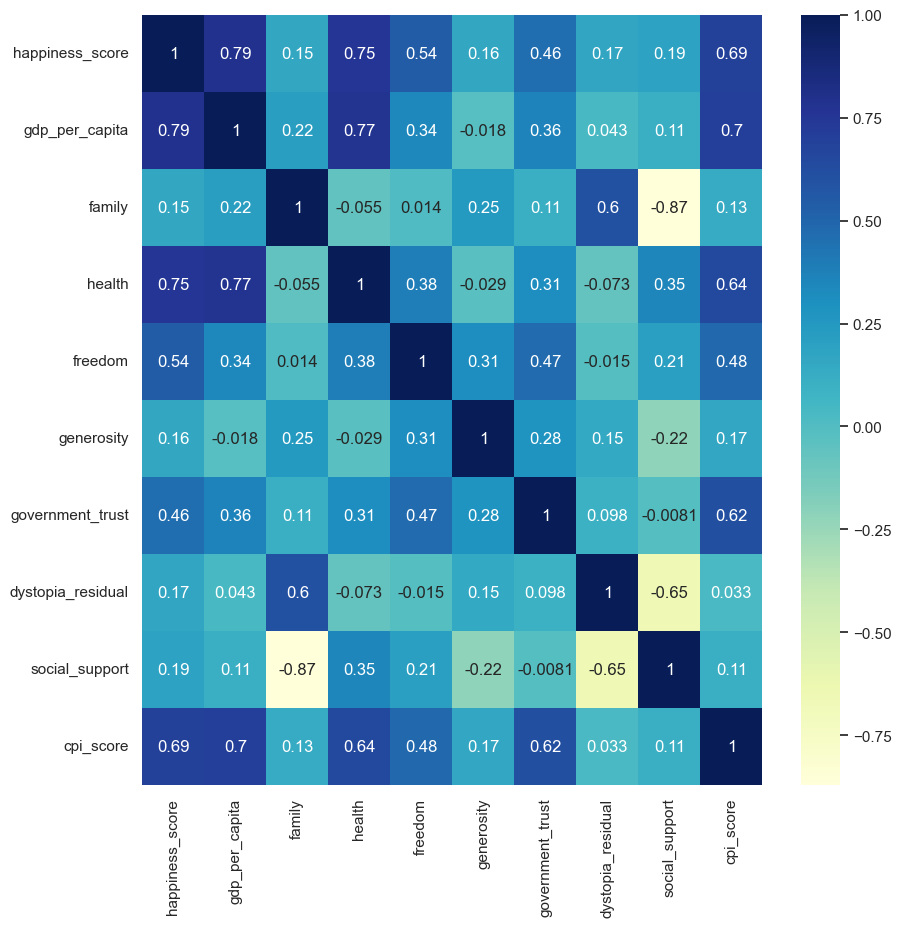

In [966]:
# построим heatmap всех корреляционных зависимостей
df = df.drop(["Country", "continent", "Year"], axis=1)

sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

**Задание 2**

In [967]:
df_gas = pd.read_csv("gas_sales_data.csv", usecols=["Temperature", "Sum"])
df_gas.info()
df_gas.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  252 non-null    float64
 1   Sum          252 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


,Temperature,Sum
count,252.000000,2.520000e+02
mean,13.367381,1.666574e+06
std,9.540984,7.965762e+05
min,-5.740000,4.513220e+05
25%,4.657500,1.094284e+06
50%,14.315000,1.436072e+06
75%,22.260000,2.226306e+06
max,28.560000,3.748910e+06


<Axes: xlabel='Temperature', ylabel='Sum'>

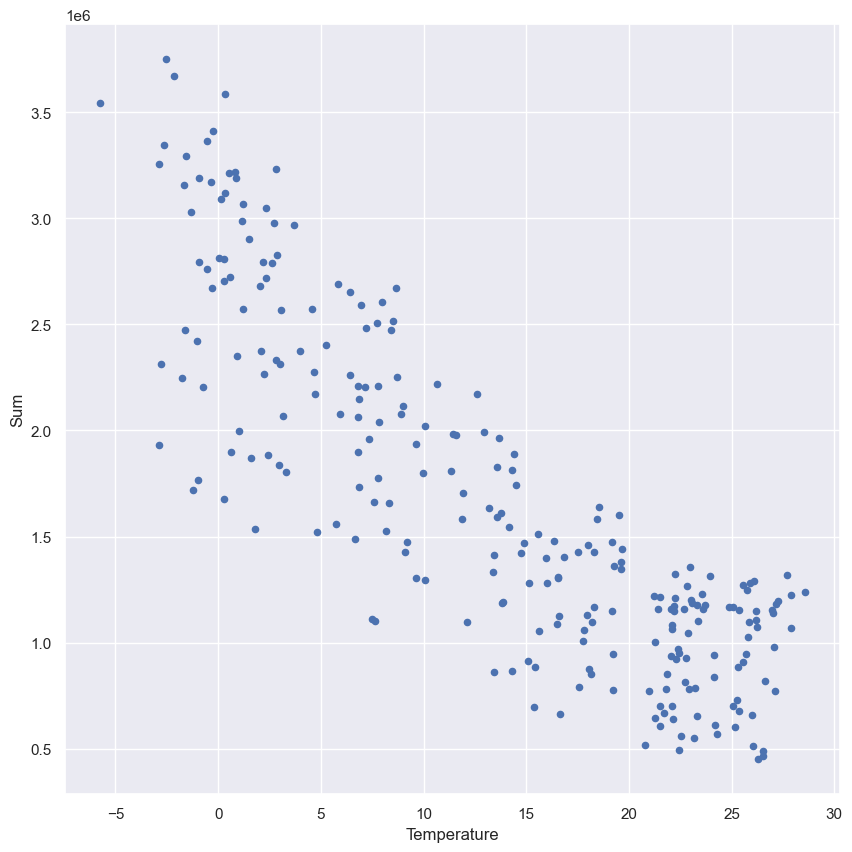

In [968]:
df_gas.plot(kind="scatter", x="Temperature", y="Sum")

In [969]:
X = df_gas[["Temperature"]]
y = df_gas["Sum"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [970]:
X_train.shape

(176, 1)

In [971]:
y_train.shape

(176,)

In [972]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [973]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.769403571876491

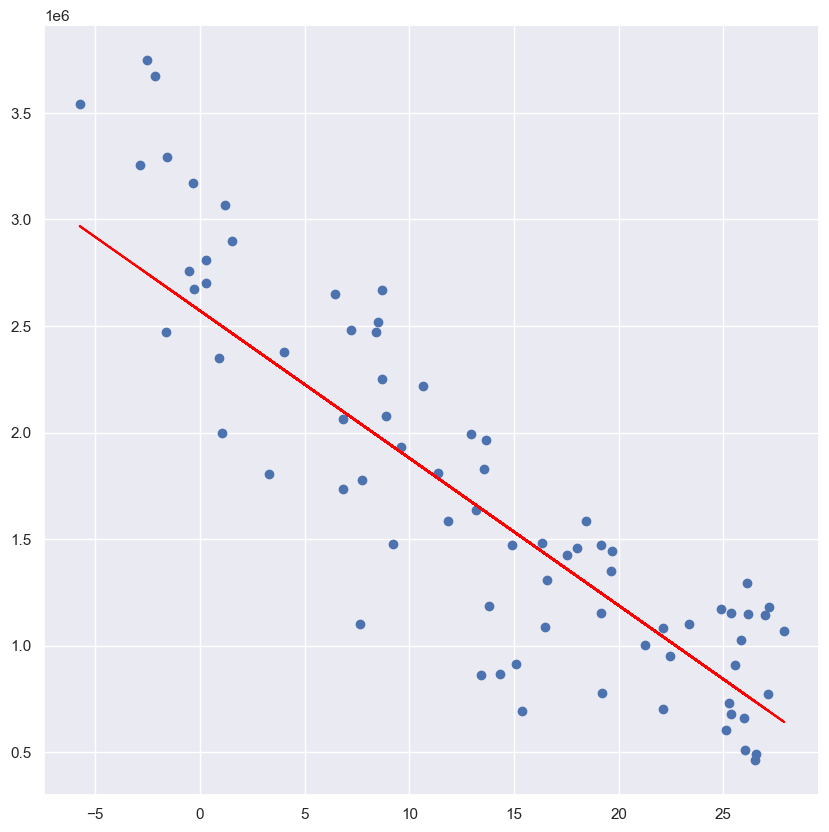

In [974]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="red")

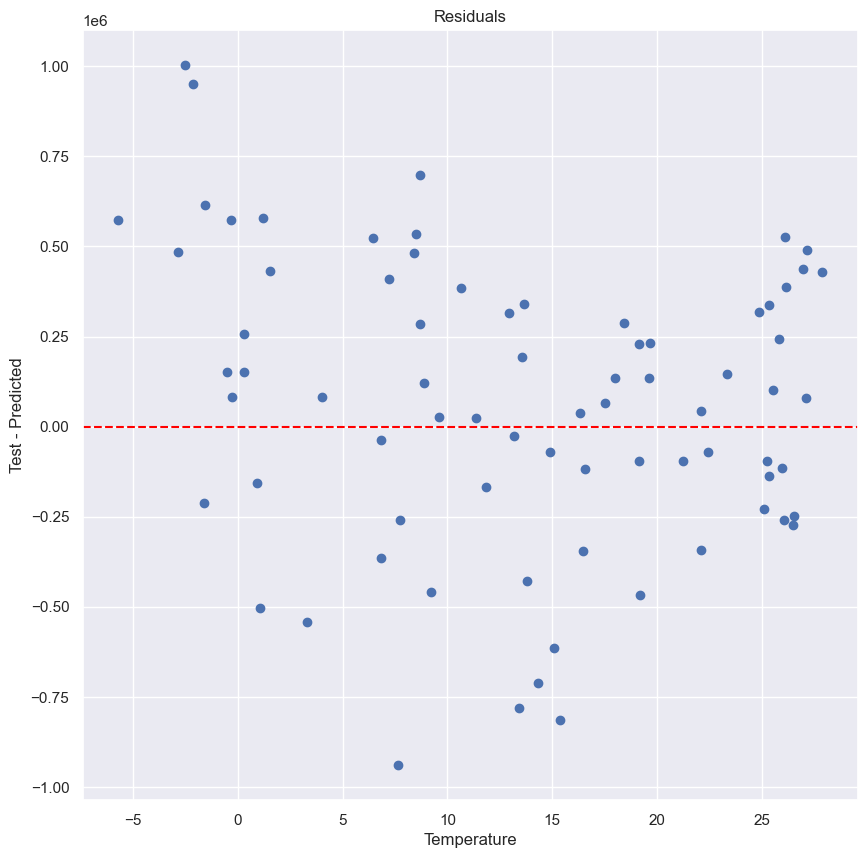

In [975]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(X_test, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals")
plt.xlabel("Temperature")
plt.ylabel("Test - Predicted")
plt.show()
# как видно из графика остатков - в нем отсутсвуют паттерны, а значит наиболее вероятно, что модель хорошо определеила зависимости между данными

In [976]:
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE: {round(mape, 2)} %")

# mean average percent error на сооьношении обучаешей выборки к тестовой 80/20 показал MAPE=27, если перераспределить отношение как 70/30, то MAPE=23.8%, что уже получше, хотя результат предсказания суммы в зависимости от температуры оказался посредственным, так как MAPE > 20%

MAPE: 23.85 %
